In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
h = 6.62607015e-34 #Planck's constant in Js
h_eV = h/1.6022e-19 #Planck's constant in eVs
hbar = h/(2*np.pi) #reduced Planck's constant
m = 9.1093837e-31 #electron mass in kg
s = 5000 #iterator number where neccessary
a = 10 #length of box from -a/2 to a/2
j = cmath.sqrt(-1)

In [51]:
def bisection(f, d, b, tol=1e-6):
    """
    Find a root of f(x) in the interval a<x<b, using bisection search.

    A valid interval must have a < b, and f(a) and f(b) must have opposite signs.

    Returns: 
        A root of x0, i.e. a solution to f(x0) = 0.

    Args:
        f: function to be studied; should take one argument.
        a: lower end of search interval
        b: upper end of search interval

        tol: error tolerance for result (default: 1e-6)

     If either f(d) or f(b) is zero, then we already have a solution! """
    
    if f(d) == 0:
        return a
    if f(b) == 0:
        return b

    # Spot check for valid interval
    assert b>d
    if f(b) / f(d) > 0:
        return 'invalid interval'

    while (b-d) > tol:
        c = (d+b)/2
        if f(c) / f(d) < 0:
            # c and a have opposite sign: new interval is [d,c]
            b = c
        elif f(c) / f(b) < 0:
            # c and b have opposite sign: new interval is [c,b]
            d = c
        else:
            # Only other possibility is that f(c) was exactly zero!
            return c
    else:
        return (d+b)/2  # Think: why not `return c`?

In [52]:
def Energy(z_zeros):
    E = []
    for i in range(len(z_zeros)):
        Energy = (2*((z_zeros[i])**2)*(hbar**2))/(m*(a**2)) 
        E.append(-1*Energy)  
    return E
def k(Energy_array): #Finds an array of wave numbers k
    k = np.sqrt(2*m*(abs(Energy_array))/hbar**2)
    return k

Text(0, 0.5, 'flux')

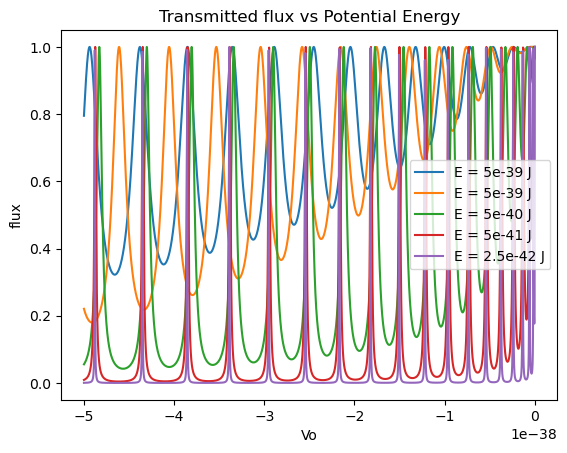

In [53]:
#Eparticle = Erange[0] #J
well_potential = np.linspace(-5e-38,0,s) #J


Erange = [np.linspace(0.5e-38,0.5e-38,s),np.linspace(0.25e-38,0.5e-38,s),np.linspace(0.5e-39,0.5e-39,s),np.linspace(0.5e-40,0.5e-40,s),np.linspace(0.25e-41,0.25e-41,s)]
for i in range(len(Erange)):
    q_wellr = np.sqrt((2*m*(Erange[i]-well_potential))/(hbar**2)) #in well wave number
    k_wellr = k(Erange[i])

    Tr = (2*k_wellr*q_wellr)/((2*k_wellr*q_wellr*np.cos(2*q_wellr*a)) + -1*j*(q_wellr**2 + k_wellr**2)*np.sin(2*q_wellr*a))
    T_sqr = (np.abs(Tr))**2
    plt.plot(well_potential, T_sqr, label = f'E = {max(Erange[i])} J')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
#plt.ylim(0.5,1.05)
#plt.xlim(-1e-38,0)
#print(T_sq[4300])
#plt.xlim(-1e-38,0)


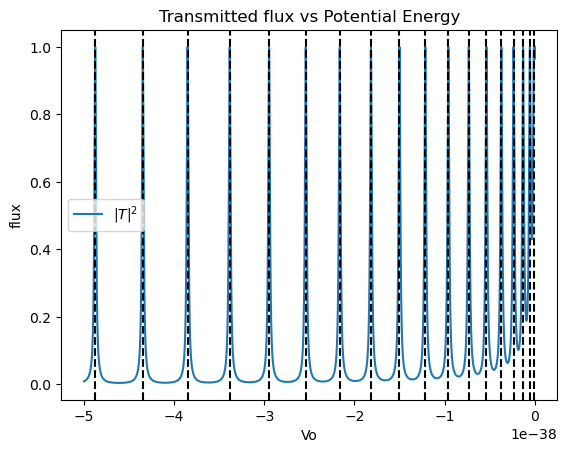

In [57]:
Eparticle = np.linspace(5e-41,5e-41,s) #J
well_potential = np.linspace(-5e-38,0,s) #J


Erange = [np.linspace(0.5e-41,0.5e-41,s),np.linspace(0.5e-42,0.5e-42,s),np.linspace(0.25e-42,0.25e-42,s),np.linspace(0.5e-43,0.5e-43,s),np.linspace(0.25e-43,0.25e-43,s)]

q_wellr = np.sqrt((2*m*(Eparticle-well_potential))/(hbar**2)) #in well wave number
k_wellr = k(Eparticle)

Tr = (2*k_wellr*q_wellr)/((2*k_wellr*q_wellr*np.cos(2*q_wellr*a)) + -1*j*(q_wellr**2 + k_wellr**2)*np.sin(2*q_wellr*a))
T_sqr = (np.abs(Tr))**2
plt.plot(well_potential, T_sqr, label = '$|T|^{2}$')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
#plt.ylim(0.5,1.05)
#plt.xlim(-1e-38,0)
#print(T_sq[4300])
#plt.xlim(-1e-38,0)

ints = np.arange(1,19,1)
VooT = []
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
#print(E_maxT)
for i in range(len(VooT)):
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')

In [58]:
#plt.plot((well_potential[0:4976]), EBSNT, color = 'purple', label = 'Bound state energy nearest threshold')
#plt.xlabel('Vo')
#plt.ylabel('Bound state nearest threshhold')
#print(EBSNT)
#for i in range(len(VooT)):
 #   plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')
#well_potentialf = np.linspace(-5e-38,0,10000)
#for i in range(len(well_potentialf)):
 #   if 0 < i < 2000:
  #      zo_Vof = (a/hbar)*np.sqrt(m*abs(well_potentialf[i])/2)
   #     Erangef = np.linspace(well_potentialf[i]+1e-40, 1e-60,10000)
    #    KErange = Erangef - well_potentialf
      #  zrangef = (k(KErange)*(a/2))[::-1]
    #    diffe = (np.tan(zrangef) - np.sqrt((zo_Vof/zrangef)**2 - 1))
    #    def y_difff(z):
    #        difff = (np.tan(z) - np.sqrt((zo_Vof/z)**2 - 1))
    #        return difff
    #    plt.plot(zrangef,y_difff(zrangef))
    #pot_z = bisection(y_difff,9,10)
    #if type(pot_z) == str:
     #   print(i)

                          
#plt.plot(zrangef,np.zeros(len(zrangef)),0, color = 'black')
#plt.ylim(-3,3)
#plt.xlim(8,13)


    

[-2.3796263235873353e-40, -7.573509933933832e-40, -1.5920646280060505e-39, -5.4572995907806545e-39, -7.197783654440085e-39, -9.116838504587655e-39, -1.8067087179885552e-38, -2.0891396113685257e-38, -2.3851470821001884e-38, -3.812647946259965e-38, -4.199878274773925e-38, -6.190452223364477e-38, -6.650238487880801e-38]


C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\3142673488.py:12: RuntimeWarning: invalid value encountered in sqrt
  differenceVo = (np.tan(z) - np.sqrt((zo_VoVo/z)**2 - 1))


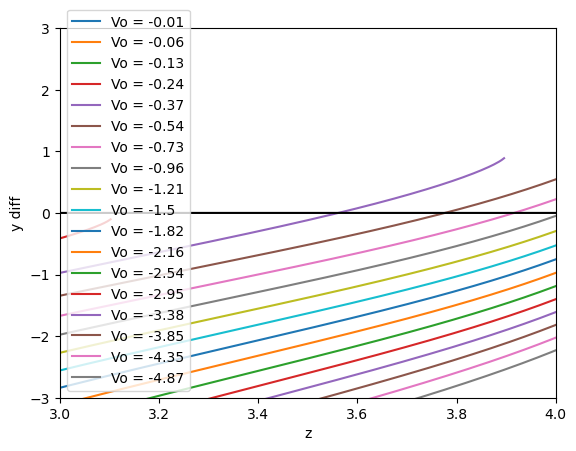

In [59]:
#print(VooT)
largest_z = []
min_z = []
possible_Es = []
Eigenstates = []
error = 0
for i in range(len(VooT)):
    zo_VoVo = (a/hbar)*np.sqrt(m*abs(VooT[i])/2)
    E_ranges = np.linspace(min(VooT)+1e-60, -1e-60,s)
    zranges = k(E_ranges)*(a/2)
    def y_diffVo(z):
        differenceVo = (np.tan(z) - np.sqrt((zo_VoVo/z)**2 - 1))
        return differenceVo
    if 16 <= i <= 17:
        min_z.append(bisection(y_diffVo,12.75,13.25))
    if 12 <= i <= 13:
        min_z.append(bisection(y_diffVo,9.5,10.25))
    if 8 <= i <= 10:
        min_z.append(bisection(y_diffVo,6.4,7.2))
    if 4 <= i <= 6:
        min_z.append(bisection(y_diffVo,3.4,4.2))
    if 0 <= i <= 2:
     min_z.append(bisection(y_diffVo,0.25,1.25))
    

    plt.plot(zranges,y_diffVo(zranges),label = f'Vo = {round((VooT[i]*1e38),2)}') 
#print(possible_Es)
#print(min_z)
possible_Es = Energy(min_z)
for j in range(len(possible_Es)):
    Eigenstate = possible_Es[j] + VooT[j]
    Eigenstates.append(Eigenstate)

print(Eigenstates)
plt.plot(zranges,np.zeros(len(zranges)),0, color = 'black')
plt.ylim(-3,3)
plt.xlim(3,4)
plt.xlabel('z')
plt.ylabel('y diff')
plt.legend()

In [62]:
step = 0.01
ao = step
bo = 2*step

def iterator(f, zmax = 14.5):
    zz_vals = []
    zz_interval = []
    float_index = 0
    
    for i in range(s):
        A = ao + i*step
        B = bo + i*step
        if B > zmax:
            break
        maybe_zero = bisection(f, d=A, b=B)
        if type(maybe_zero) == float:
            float_index += 1
            if float_index % 2 == 0:
                zz_vals.append('false zero')
                zz_interval.append(('invalid interval'))
            else:   
                zz_vals.append(maybe_zero)
                zz_interval.append([ao + i*step,bo + i*step]) 
   
    zs_and_intervals = []
    j = 0
    while j < len(zz_vals):
        if type(zz_vals[j]) == float:
            zs_and_intervals.append(zz_vals[j])
        j += 1
    
    return zs_and_intervals

# Transmission Maximums (deep well)

5.037308801819164e-40


C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\4135119831.py:17: RuntimeWarning: invalid value encountered in sqrt
  difference = (np.tan(z) - np.sqrt((zo_Vo/z)**2 - 1))


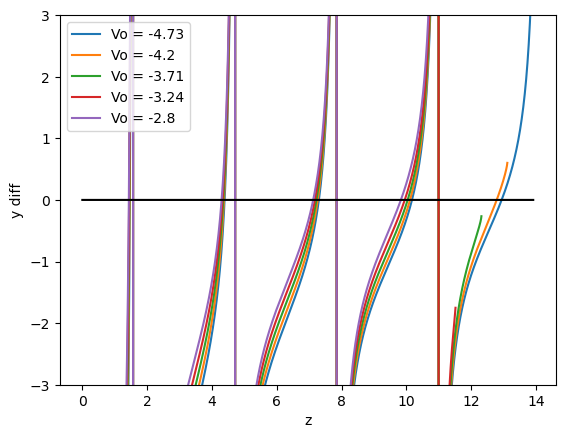

In [64]:
Vo_Tmax = [well_potential[270], well_potential[797], well_potential[1294], well_potential[1759], well_potential[2197]]
ZZeros = []
possible_E = []
error = 0
for i in range(len(Vo_Tmax)):
    zo_Vo = (a/hbar)*np.sqrt(m*abs(Vo_Tmax[i])/2)
    #print(zo_Vo)
    E_range = np.linspace(min(Vo_Tmax)+1e-60, -1e-60,s)
    #E_range = np.linspace(-5e-38, 0,s)
    #print(E_range)
    zmax_well = k(max(E_range))*(a/2)
    #print(zmax_well)
    zrange = k(E_range)*(a/2)
    #print(zrange)
    #print((zo_Vo/zrange)**2-1)
    def y_diff(z):
        difference = (np.tan(z) - np.sqrt((zo_Vo/z)**2 - 1))
        return difference
    plt.plot(zrange,y_diff(zrange),label = f'Vo = {round((Vo_Tmax[i]*1e38),2)}')

low_E = [bisection(y_diff,1.3,1.5),0,0,0,0]
print(-1*Energy(low_E)[0])


plt.plot(zrange,np.zeros(len(zrange)),0, color = 'black')
plt.ylim(-3,3)
#plt.xlim(zrange[4970],zrange[4900])
plt.xlabel('z')
plt.ylabel('y diff')
plt.legend()

# Reflection Maximums (deep well)

C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\3996430515.py:16: RuntimeWarning: invalid value encountered in sqrt
  differenceR = (np.tan(z) - np.sqrt((zo_VoR/z)**2 - 1))


TypeError: 'list' object is not callable

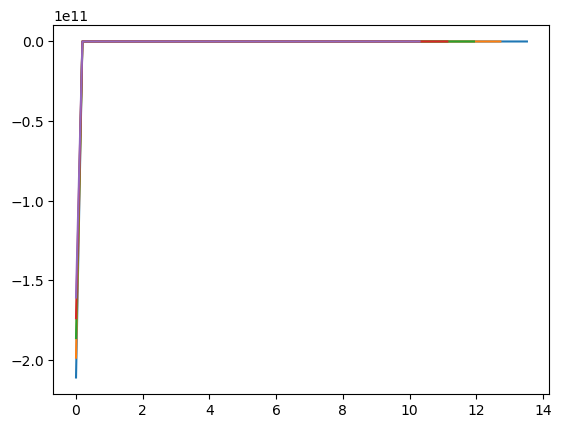

In [66]:
Vo_Rmax = [well_potential[540], well_potential[1050], well_potential[1525], well_potential[1975], well_potential[2410]]
ZZeros_R = []
possible_E_R = []
for i in range(len(Vo_Rmax)):
    zo_VoR = (a/hbar)*np.sqrt(m*abs(Vo_Rmax[i])/2)
    #print(zo_Vo)
    #E_rangeR = np.linspace(-5e-38, 0,s)
    E_rangeR = np.linspace(min(Vo_Rmax)+1e-60, -1e-60,s)
    #print(E_range)
    zmax_wellR = k(max(E_rangeR))*(a/2)
    #print(zmax_well)
    zrangeR = k(E_rangeR)*(a/2)
    #print(zrange)
    #print((zo_Vo/zrange)**2-1)
    def y_diffR(z):
        differenceR = (np.tan(z) - np.sqrt((zo_VoR/z)**2 - 1))
        return differenceR
    plt.plot(zrangeR,y_diffR(zrangeR),label = f'Vo = {round((Vo_Rmax[i]*1e38),2)}')

low_ER = [bisection(y_diffR,1.3,1.5),0,0,0,0]
print(-1*Eigenstates(low_ER)[0])


plt.plot(zrangeR,np.zeros(len(zrange)),0, color = 'black')
plt.ylim(-3,3)
#plt.xlim(zrange[2800],zrange[2400])
#plt.xlim(zrange[2800],zrange[2000])
plt.xlabel('z')
plt.ylabel('y diff')
plt.legend()

# Increasing transmission

In [ ]:
Vo_half = [well_potential[207], well_potential[333], well_potential[734], well_potential[861]]

In [ ]:
ZZeros_inc = []
possible_E_inc = []
for i in range(len(Vo_half)):
    zo_Voinc = (a/hbar)*np.sqrt(m*abs(Vo_half[i])/2)
    #print(zo_Vo)
    E_rangeinc = np.linspace(-5e-38, 0,s)
    #E_rangeinc = np.linspace(min(Vo_half)+1e-60, -1e-60,s)
    #print(E_range)
    zmax_wellinc = k(max(E_rangeinc))*(a/2)
    #print(zmax_well)
    zrangeinc = k(E_rangeinc)*(a/2)
    #print(zrangeinc)
    #print((zo_Vo/zrange)**2-1)
    def y_diffinc(z):
        differenceinc = (np.tan(z) - np.sqrt((zo_Voinc/z)**2 - 1))
        return differenceinc
    plt.plot(zrangeinc,y_diffinc(zrangeinc),label = f'Vo = {round((Vo_half[i]*1e38),2)}')

low_Einc = [bisection(y_diffinc,1.3,1.5),0,0,0,0]
print(-1*Eigenstates(low_Einc)[0])


plt.plot(zrangeinc,np.zeros(len(zrangeinc)),0, color = 'black')
plt.ylim(-3,3)
#plt.xlim(zrange[4955],zrange[4940])
plt.xlabel('z')
plt.ylabel('y diff')
plt.legend()

# Transmission Maximums (shallow well)

In [ ]:
Vo_Tmaxsh = [well_potential[4183], well_potential[4413], well_potential[4607], well_potential[4473], well_potential[4911]]
ZZerossh = []
possible_Esh = []
for i in range(len(Vo_Tmaxsh)):
    zo_Vosh = (a/hbar)*np.sqrt(m*abs(Vo_Tmaxsh[i])/2)
    #print(zo_Vo)
    E_rangesh = np.linspace(min(Vo_Tmaxsh)+1e-60, -1e-60,s)
    #E_range = np.linspace(-5e-38, 0,s)
    #print(E_range)
    zmax_wellsh = k(max(E_rangesh))*(a/2)
    #print(zmax_well)
    zrangesh = (k(E_rangesh)*(a/2))[::-1]
    #print(zrangesh)
    #print((zo_Vo/zrange)**2-1)
    def y_diffsh(z):
        differencesh = (np.tan(z) - np.sqrt((zo_Vosh/z)**2 - 1))
        return differencesh
    plt.plot(zrangesh,y_diffsh(zrangesh),label = f'Vo = {round((Vo_Tmaxsh[i]*1e38),2)}')

low_Esh = [bisection(y_diffsh,1,1.2),0,0,0,0]
print(-1*Eigenstates(low_Esh)[0])


plt.plot(zrange,np.zeros(len(zrange)),0, color = 'black')
plt.ylim(-3,3)
#plt.xlim(zrange[4970],zrange[4900])
plt.xlabel('z')
plt.ylabel('y diff')
plt.legend()


# Reflection Maximums (shallow well)

C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\3449436292.py:16: RuntimeWarning: invalid value encountered in sqrt
  differenceshr = (np.tan(z) - np.sqrt((zo_Voshr/z)**2 - 1))


TypeError: 'list' object is not callable

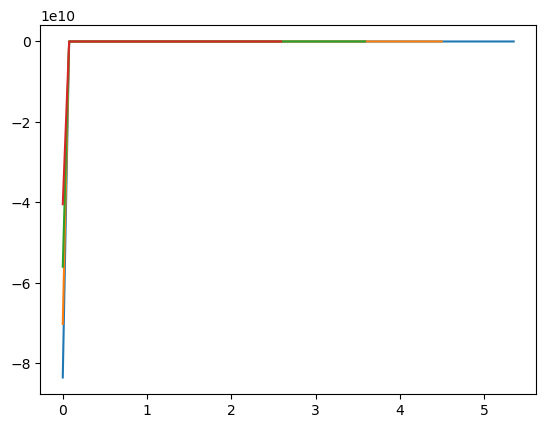

In [67]:
Vo_Rmaxsh = [well_potential[4300], well_potential[4505], well_potential[4685], well_potential[4835]]
ZZerosshr = []
possible_Eshr = []
for i in range(len(Vo_Rmaxsh)):
    zo_Voshr = (a/hbar)*np.sqrt(m*abs(Vo_Rmaxsh[i])/2)
    #print(zo_Vo)
    E_rangeshr = np.linspace(min(Vo_Rmaxsh)+1e-60, -1e-60,s)
    #E_range = np.linspace(-5e-38, 0,s)
    #print(E_range)
    zmax_wellshr = k(max(E_rangeshr))*(a/2)
    #print(zmax_well)
    zrangeshr = (k(E_rangeshr)*(a/2))[::-1]
    #print(zrangesh)
    #print((zo_Vo/zrange)**2-1)
    def y_diffshr(z):
        differenceshr = (np.tan(z) - np.sqrt((zo_Voshr/z)**2 - 1))
        return differenceshr
    plt.plot(zrangeshr,y_diffshr(zrangeshr),label = f'Vo = {round((Vo_Rmaxsh[i]*1e38),2)}')

low_Eshr = [bisection(y_diffshr,1.1,1.2),0,0,0,0]
#print(low_Eshr)
print(-1*Eigenstates(low_Eshr)[0])


plt.plot(zrange,np.zeros(len(zrange)),0, color = 'black')
plt.ylim(-3,3)
#plt.xlim(zrange[4970],zrange[4950])
plt.xlabel('z')
plt.ylabel('y diff')
plt.legend()


# Odd slns

In [70]:
Vo_TmaxO = [well_potential[270], well_potential[797], well_potential[1294], well_potential[1759], well_potential[2197]]
ZZerosO = []
possible_EO = []
for i in range(len(Vo_TmaxO)):
    lambdaO = (2*m*Vo_TmaxO[i]*a**2)/(hbar**2)
    #print(zo_Vo)
    E_rangeO = np.linspace(min(Vo_TmaxO)+1e-60, -1e-60,s)
    q = np.sqrt((2*m/(hbar**2))*(abs(Vo_TmaxO[i])-abs(E_rangeO)))
    y = q*a
    #print(y)
    #print(E_range)
    zmax_wellO = k(max(E_rangeO))*(a/2)
    #print(zmax_well)
    zrangeO = k(E_rangeO)*(a/2)
    #print(zrange)
    #print((zo_Vo/zrange)**2-1)
    def y_diffO(y):
        differenceO = ((np.sqrt(lambdaO - y**2))/y + 1/(np.tan(y)))
        return differenceO
    #plt.plot(y,y_diffO(y),label = f'Vo = {round((Vo_Tmax[i]*1e38),2)}')

low_EO = [bisection(y_diffO,1.3,1.5),0,0,0,0]
#print(low_EO)
print(-1*Eigenstates(low_EO)[0])


#plt.plot(zrange,np.zeros(len(zrange)),0, color = 'black')
#plt.ylim(-3,3)
#plt.xlim(zrange[4970],zrange[4900])
#plt.xlabel('z')
#plt.ylabel('y diff')
#plt.legend()

C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\3924980684.py:8: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt((2*m/(hbar**2))*(abs(Vo_TmaxO[i])-abs(E_rangeO)))
C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\3924980684.py:18: RuntimeWarning: invalid value encountered in sqrt
  differenceO = ((np.sqrt(lambdaO - y**2))/y + 1/(np.tan(y)))


TypeError: 'list' object is not callable

[1.4, 0, 0, 0, 0]


C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\1101786350.py:18: RuntimeWarning: invalid value encountered in sqrt
  differenceOR = ((np.sqrt(lambdaOR - yR**2))/yR + 1/(np.tan(yR)))
C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\1101786350.py:18: RuntimeWarning: divide by zero encountered in divide
  differenceOR = ((np.sqrt(lambdaOR - yR**2))/yR + 1/(np.tan(yR)))
C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\1101786350.py:8: RuntimeWarning: invalid value encountered in sqrt
  qR = np.sqrt((2*m/(hbar**2))*(abs(Vo_RmaxO[i])-abs(E_rangeOR)))


TypeError: 'list' object is not callable

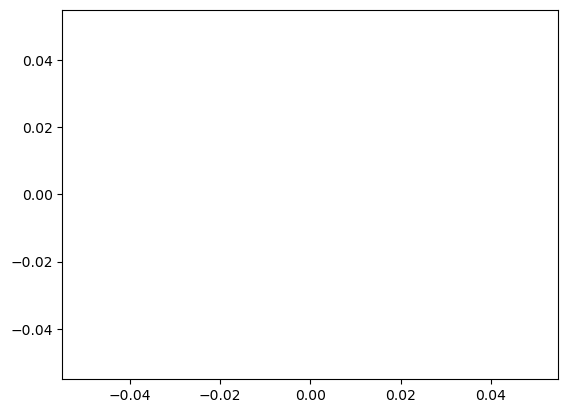

In [72]:
Vo_RmaxO = [well_potential[540], well_potential[1050], well_potential[1525], well_potential[1975], well_potential[2410]]
ZZerosOR = []
possible_EOR = []
for i in range(len(Vo_RmaxO)):
    lambdaOR = (2*m*Vo_RmaxO[i]*a**2)/(hbar**2)
    #print(zo_Vo)
    E_rangeOR = np.linspace(min(Vo_RmaxO)+1e-60, -1e-60,s)
    qR = np.sqrt((2*m/(hbar**2))*(abs(Vo_RmaxO[i])-abs(E_rangeOR)))
    yR = qR*a
    #print(y)
    #print(E_range)
    #zmax_wellOR = k(max(E_rangeO))*(a/2)
    #print(zmax_well)
    #zrangeO = k(E_rangeO)*(a/2)
    #print(zrange)
    #print((zo_Vo/zrange)**2-1)
    def y_diffOR(yR):
        differenceOR = ((np.sqrt(lambdaOR - yR**2))/yR + 1/(np.tan(yR)))
        return differenceOR
    plt.plot(yR,y_diffOR(yR),label = f'Vo = {round((Vo_Tmax[i]*1e38),2)}')

low_EOR = [bisection(y_diffOR,1.3,1.5),0,0,0,0]
print(low_EO)
print(-1*Eigenstates(low_EO)[0])


#plt.plot(zrange,np.zeros(len(zrange)),0, color = 'black')
#plt.ylim(-3,3)
#plt.xlim(zrange[4970],zrange[4900])
#plt.xlabel('z')
#plt.ylabel('y diff')
#plt.legend()

[ 3  4  5  6  7  8  9 10 11 12 13 14 15]


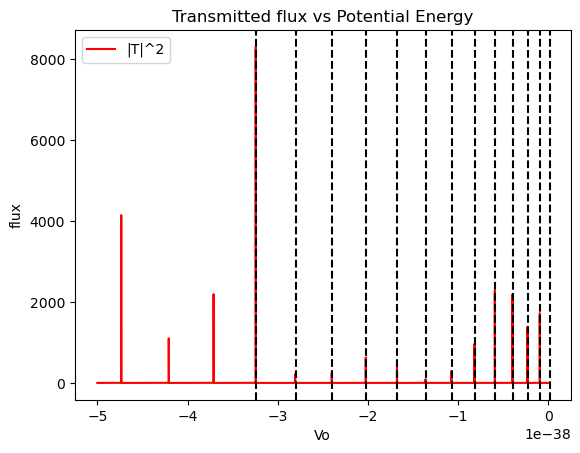

In [73]:
Eparticle = np.linspace(0.15e-38,0.15e-38,s) #J
well_potential = np.linspace(-5e-38,0,s) #J

q_well = np.sqrt((2*m*(Eparticle-well_potential))/(hbar**2)) #in well wave number
k_well = k(Eparticle)

T = (2*k_well*q_well)/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))
T_sq = (np.abs(T))**2


plt.plot(well_potential, T_sq, color='red', label='|T|^2')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
#plt.ylim(0,0.5)

ints = np.arange(3,16,1)
print(ints)
VooT = []
for i in range(len(ints)):
    Voo = 0.15e-38 + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
#print(E_maxT)
for i in range(len(VooT)):
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')

[0.22772801 0.22612283 0.22455073 0.22301112 0.22150343 0.22002709
 0.21858156 0.2171663  0.2157808  0.21442454 0.21309704 0.21179782
 0.21052639 0.20928232 0.20806515 0.20687444 0.20570978 0.20457076
 0.20345696 0.20236801 0.20130352 0.20026313 0.19924646 0.19825317
 0.19728293 0.19633539 0.19541023 0.19450714 0.19362582 0.19276597
 0.19192729 0.19110952 0.19031237 0.18953558 0.18877889 0.18804206
 0.18732484 0.186627   0.18594831 0.18528855 0.1846475  0.18402497
 0.18342074 0.18283463 0.18226644 0.181716   0.18118313 0.18066766
 0.18016944 0.17968829 0.17922407 0.17877664 0.17834586 0.17793159
 0.17753369 0.17715206 0.17678657 0.17643711 0.17610357 0.17578585
 0.17548385 0.17519747 0.17492664 0.17467128 0.17443129 0.17420661
 0.17399718 0.17380292 0.17362379 0.17345973 0.17331068 0.17317661
 0.17305748 0.17295325 0.17286389 0.17278938 0.17272969 0.17268481
 0.17265472 0.17263943 0.17263892 0.1726532  0.17268227 0.17272615
 0.17278485 0.17285838 0.17294679 0.17305009 0.17316831 0.1733

NameError: name 'E_maxT' is not defined

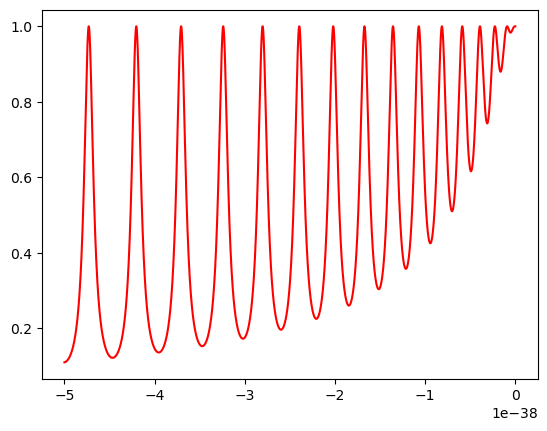

In [75]:
Eparticle = np.linspace(0.15e-38,0.15e-38,s) #J
well_potential = np.linspace(-5e-38,0,s) #J

q_well = np.sqrt((2*m*(Eparticle-well_potential))/(hbar**2)) #in well wave number
k_well = k(Eparticle)

T_sqform = ((2*k_well*q_well)**2)/((4*(k_well**2)*(q_well**2)*((np.cos(2*a*q_well))**2)) + (((k_well**2 + q_well**2)**2)*((np.sin(2*q_well*a))**2)))

index = []
for i in range(len(T_sqform)):
    if type(T_sqform[i]) == np.nan:
        index.append(i)
print(T_sqform[1900:2100])
plt.plot(well_potential, T_sqform, color = 'red')
for i in range(len(E_maxT)):
    plt.axvline(E_maxT[i], color = 'black', linestyle = 'dashed')

In [ ]:
Vwell = 5e-38
Epr = np.linspace(0,0.15e-38, s)
T_inv = 1 + ((Vwell**2)/(4*Epr*(Epr + Vwell)))*((np.sin((2*a/hbar)*np.sqrt(2*m*(Epr + Vwell))))**2)
plt.plot(Epr[0:4999],T_inv[0:4999], color = 'red', linestyle = 'dashed', label = 'inverse transmission coefficient')
#print(((Vwell**2)/(4*Epr*(Epr + Vwell)))[4700:5000])
plt.legend()
plt.ylabel('Inverse transmission coefficient')
plt.xlabel('particle energy')

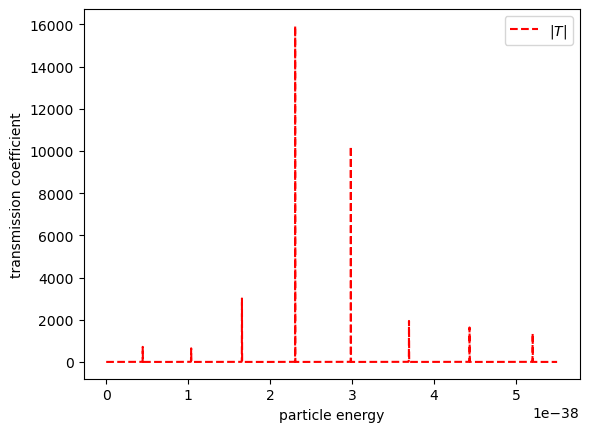

In [78]:
Vwell = -5e-38
Epr = np.linspace(0,0.55e-37, s) #J

q_well2 = np.sqrt((2*m*(Epr-Vwell))/(hbar**2)) #in well wave number
k_well2 = k(Epr)

T2 = (2*k_well2*q_well2)/((2*k_well2*q_well2*np.cos(2*q_well2*a)) + -1*j*(q_well2**2 + k_well2**2)*np.sin(2*q_well2*a))
T_sq2 = (np.abs(T2))**2



plt.plot(Epr, T_sq2, linestyle = 'dashed', color = 'red', label = '$|T|$')
#plt.plot(Epr,T_sq2, linestyle = 'dotted', color = 'blue', label = '$|T|^{-1}$')
plt.xlabel('particle energy')
plt.ylabel('transmission coefficient')
plt.legend()

In [80]:
assert 1 == 2

AssertionError: 

C:\Users\nienn\AppData\Local\Temp\ipykernel_12684\2310978770.py:18: RuntimeWarning: invalid value encountered in sqrt
  diff2 = (np.tan(z) - np.sqrt((zo_Vo2/z)**2 - 1))


Text(0.5, 0, 'z')

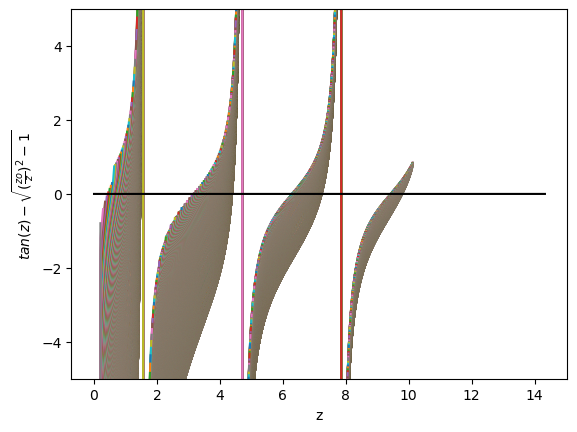

In [82]:
highest_z = []
for i in range(len(well_potential)):
    zo_Vo2 = (a/hbar)*np.sqrt(m*abs(well_potential[i])/2)
    #print(zo_Vo2)
    Erange2 = np.linspace(well_potential[i]+1e-40, 1e-60,s)
    KErange = Erange2 - well_potential
    #print(E_range2)
    #zmax_well2 = max(k((E_range2))*(a/2))
    #print(zmax_well2)
    zrange2 = (k(KErange)*(a/2))[::-1]

    #valid_range = []
    #for j in range(len(zrange2)):
     #   if ((zo_Vo2/zrange2[j])**2-1) > 0:
      #      valid_range.append(zrange2[j])
            
    def y_diff2(z):
        diff2 = (np.tan(z) - np.sqrt((zo_Vo2/z)**2 - 1))
        return diff2

    if i <= 873:
        z_maximum = bisection(y_diff2,12,13)
        highest_z.append(z_maximum)
        
    if 873 < i <= 2307:
        z_maximum = bisection(y_diff2,9,10.5)
        highest_z.append(z_maximum)
    if 2308 < i <= 3870:
        z_maximum = bisection(y_diff2,6,7.6)
        highest_z.append(z_maximum)
    if 3871 < i <= 4680:
        z_maximum = bisection(y_diff2,2.75,4.45)
        highest_z.append(z_maximum)
    if 4680 < i <= 4977:
        z_maximum = bisection(y_diff2,0.3,1.475)
        highest_z.append(z_maximum)
        
        
    plt.plot(zrange2,y_diff2(zrange2),label = f'Vo = {round((well_potential[i]*1e38),2)}')
    #if i < 20:
     #   plt.plot(valid_range,y_diff2(valid_range),label = f'Vo = {round((well_potential[i]*1e38),2)}')
    #if 3940 < i < 3960:
     #   plt.plot(valid_range,y_diff2(valid_range),label = f'Vo = {round((well_potential[i]*1e38),2)}')
#print(highest_z) 
#for w in range(len(highest_z)):
    #if highest_z[w] == 0.6951201617717744:
       # print(w)
EBSNT = -1*(Energy(highest_z) - well_potential[0:4976])
#print(EBSNT2)
plt.plot(zrange2,np.zeros(len(zrange2)),0, color = 'black')
#plt.xlim(1.3,1.5)
plt.ylim(-5,5)
plt.ylabel(r'$tan(z) - \sqrt{(\frac{zo}{z})^2 - 1}$')
plt.xlabel('z')

In [83]:
#print(EBSNT[4500:4900])
tol = 1e-43
for i in range(len(EBSNT)):
    if abs(EBSNT[i] - -3.56682040e-39) < tol:
        print(i)

Text(0, 0.5, 'flux')

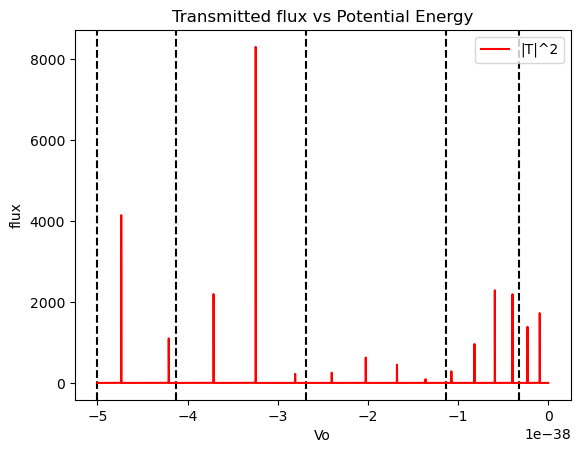

In [84]:
key_Vo = (well_potential[0],well_potential[875], well_potential[2309], well_potential[3871], well_potential[4680])
for i in range(len(key_Vo)):
    plt.axvline(key_Vo[i], color = 'black', linestyle = 'dashed')
plt.plot(well_potential, T_sq, color='red', label='|T|^2')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')

Text(0, 0.5, 'Bound state nearest threshhold')

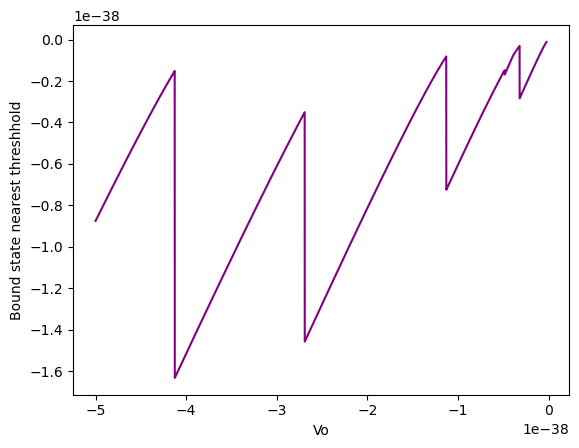

In [85]:
plt.plot((well_potential[0:4976]), EBSNT, color = 'purple', label = 'Bound state energy nearest threshold')
plt.xlabel('Vo')
plt.ylabel('Bound state nearest threshhold')
#print(EBSNT)
#for i in range(len(VooT)):
 #   plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')

# $\Psi$

In [87]:
highest_y = []
#highest_E = []
for i in range(len(well_potential)):
    L = (2*m*abs(well_potential[i]))*(a**2/hbar**2)
    #print(L)
    ErangeB = np.linspace(min(well_potential)+1e-60, -1e-60,s)
    #print(ErangeB)
    qB = np.sqrt((2*m/hbar**2))*(abs(well_potential)-abs(ErangeB))
    #print(qB)
    y = qB*a
    #print(y)
    
    valid_rangeL = []
    for j in range(len(y)):
        if (L-(y[j])**2) > 0:
            valid_rangeL.append(y[j])
    #maxer_z = max(valid_range)
    #print((zo_Vo2/maxer_z)**2-1)
   # print(valid_rangeL)
    def L_diff(y_val):
        diffL = np.sqrt(L-y**2)/y - np.tan(y)
        return diffL
   # if i <= 873:
    #    ymax = bisection(L_diff,12,13)
     #   highest_y.append(ymax)
    #if 873 < i <= 2307:
     #   ymax = bisection(L_diff,9,10.5)
      #  highest_y.append(ymax)
    #if 2308 < i <= 3870:
     #   ymax = bisection(L_diff,6,7.6)
      #  highest_y.append(ymax)
    #if 3871 < i <= 4680:
     #   ymax = bisection(L_diff,2.75,4.45)
      #  highest_y.append(ymax)
    #if 4680 < i <= 4977:
     #   ymax = bisection(y_diffB,0.3,1.475)
      #  highest_y.append(ymax)
    #plt.plot(valid_rangeL,L_diff(valid_rangeL),label = f'Vo = {round((well_potential[i]*1e38),2)}')
#print(highest_y) 
#for w in range(len(highest_y)):
    #if highest_y[w] == 0.6951201617717744:
       # print(w)
#EBSNT1 = Eigenstates(highest_y)
#print(EBSNT1)
#EBSNT2 = Eigenstates(highest_y) + well_potential[0:4976]
#print(EBSNT2)
#plt.plot(zrange2,np.zeros(len(zrange)),0, color = 'black')
#plt.xlim(1.3,1.5)
#plt.ylim(-5,5)

Redraw Transmission for different energies